In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
X_train=np.array([
    [158,64],
    [170,86],
    [183,84],
    [191,80],
    [155,49],
    [163,59],
    [180,67],
    [158,54],
    [170,67],
])
y_train=['male','male','male','male','female','female','female','female','female']
print(X_train[:,0])

[158 170 183 191 155 163 180 158 170]


In [37]:
plt.figure
plt.title('Human height and weight by sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

Text(0,0.5,'Weight in kg')

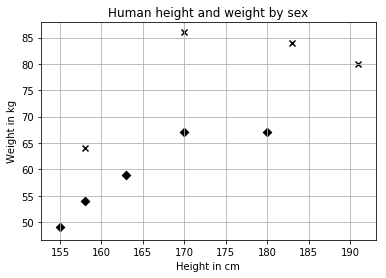

In [38]:
for i,x in enumerate(X_train):
    plt.scatter(x[0],x[1],c='k',marker='x'if y_train[i]=='male' else 'D')
plt.grid(True)
plt.show()
#enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，即i和x
#for i,x in enumerate(X_train)，固定用法
#c是颜色，D是菱形标志
#marker 的符合语句 嵌套if

In [39]:
x=np.array([[155,70]])
distance=np.sqrt(np.sum((X_train-x)**2,axis=1))
distance

array([  6.70820393,  21.9317122 ,  31.30495168,  37.36308338,
        21.        ,  13.60147051,  25.17935662,  16.2788206 ,  15.29705854])

In [40]:
nearest_neighbour_indices=distance.argsort()[:3]
nearest_neighbour_genders=np.take(y_train,nearest_neighbour_indices)
nearest_neighbour_genders
#argsort函数返回的是数组值从小到大的索引值
#np.take():从数组中取出指定元素np.take(x,indices)

array(['male', 'female', 'female'],
      dtype='<U6')

In [41]:
from collections import Counter
b=Counter(np.take(y_train,distance.argsort()[:3]))
b.most_common(1)
#（1）从Collections集合模块中引入集合类Counter
#（2）Counter(a)可以打印出数组a中每个元素出现的次数
#（3）Counter(a).most_common(2)可以打印出数组中出现次数最多的元素。参数2表示的含义是：输出几个出现次数最多的元素

[('female', 2)]

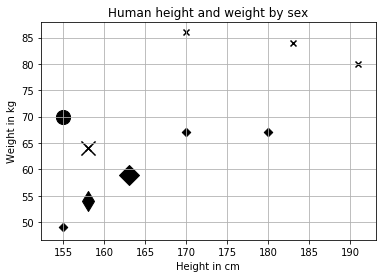

In [42]:
plt.figure
plt.title('Human height and weight by sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
for i,x in enumerate(X_train):
    plt.scatter(x[0],x[1],c='k',marker='x'if y_train[i]=='male' else 'D')
plt.grid(True)
plt.scatter(158,64,c='k',s=200,marker='x')
plt.scatter(163,59,c='k',s=200,marker='D')
plt.scatter(158,54,c='k',s=200,marker='d')
plt.scatter(155,70,c='k',s=200,marker='o')
plt.grid(True)
plt.show()

In [43]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

In [44]:
lb=LabelBinarizer()
y_train_binarized=lb.fit_transform(y_train)
y_train_binarized
#fit_transform(partData)对部分数据先拟合fit，找到该part的整体指标然后对该partData进行转换transform，从而实现数据的标准化、归一化等等。。
#训练样本用fit_transform,而测试样本用transform
#二值化的固定写法

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [45]:
K=3
clf=KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train,y_train_binarized.reshape(-1))
#对应的y应该是一个数组而不是许多的多组向量
prediction_binarized=clf.predict(np.array([155,70]).reshape(1,-1))[0]
prediction_label=lb.inverse_transform(prediction_binarized)
prediction_label

array(['female'],
      dtype='<U6')

In [46]:
X_test=np.array([
    [168,65],
    [180,96],
    [160,52],
    [169,67],
])
y_test=['male','male','female','female']

In [47]:
y_test_binarized=lb.fit_transform(y_test)
print('Binarized labels: %s' % y_test_binarized)
prediction_binarized=clf.predict(X_test)
print('Binarized prediction: %s' % prediction_binarized)
print('Binarized labels: %s' % lb.inverse_transform(prediction_binarized))

Binarized labels: [[1]
 [1]
 [0]
 [0]]
Binarized prediction: [0 1 0 0]
Binarized labels: ['female' 'male' 'female' 'female']


In [48]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized,prediction_binarized))

Accuracy: 0.75


In [49]:
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
print('Precision: %s' % precision_score(y_test_binarized,prediction_binarized))
precisions=cross_val_score(clf,X_train,y_train_binarized,cv=2,scoring='precision')
print('Mean precisions: %s' %np.mean(precisions))

Precision: 1.0
Mean precisions: 0.25


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
from sklearn.metrics import recall_score
print('Recall: %s' % recall_score(y_test_binarized,prediction_binarized))

Recall: 0.5


In [51]:
from sklearn.metrics import f1_score
print('F1_score: %s' % f1_score(y_test_binarized,prediction_binarized))

F1_score: 0.666666666667


In [52]:
from sklearn.metrics import matthews_corrcoef
print('MCC: %s' % matthews_corrcoef(y_test_binarized,prediction_binarized))

MCC: 0.57735026919


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized,prediction_binarized,target_names=['male'],labels=[1]))
#labels：array，shape = [n_labels]，报表中包含的标签索引的可选列表。 
#target_names：字符串列表，与标签匹配的可选显示名称（相同顺序）

             precision    recall  f1-score   support

       male       1.00      0.50      0.67         2

avg / total       1.00      0.50      0.67         2

